In [53]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [55]:
#388153 - 양양 #388144 - 설악 #378044 - 강릉
#shp_dirc = "/home/ubuntu/Documents/188153.shp"
shp_dirc = "/home/ubuntu/Documents/SHP/378044.shp"
shp_data = gpd.read_file(shp_dirc, encoding = "CP949")
shp_data

,L2_CODE,L2_NAME,IMG_NAME,IMG_DATE,ETC_INFO,INX_NUM,geometry
0,510,내륙습지,항공정사영상,12/31/10,구거,378044,"POLYGON ((366223.730 578275.853, 366214.152 57..."
1,510,내륙습지,항공정사영상,12/31/10,구거,378044,"POLYGON ((368133.462 579012.586, 368134.446 57..."
2,510,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367064.179 573943.782, 367011.487 57..."
3,510,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367333.326 574039.345, 367241.645 57..."
4,510,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367941.703 574610.933, 367937.885 57..."
...,...,...,...,...,...,...,...
1585,620,인공나지,항공정사영상,12/31/10,None,378044,"POLYGON ((370698.563 577297.344, 370753.464 57..."
1586,710,내륙수,항공정사영상,12/31/10,하천,378044,"POLYGON ((370894.070 574542.604, 370867.552 57..."
1587,710,내륙수,항공정사영상,12/31/10,하천,378044,"POLYGON ((371832.602 576194.245, 371868.660 57..."
1588,710,내륙수,항공정사영상,12/31/10,호소,378044,"POLYGON ((373209.220 574698.587, 373213.448 57..."


In [56]:
shp_data["L2_CODE"].value_counts()

110    299
320    221
220    216
130    189
310    115
420     97
160     79
620     74
330     65
210     57
410     41
510     34
140     32
710     24
120     16
230     13
610      6
150      4
250      4
240      2
720      1
520      1
Name: L2_CODE, dtype: int64

In [57]:
len(shp_data["L2_CODE"].unique())

22

In [58]:
shp_data.crs

<Projected CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...>
Name: PCS_ITRF2000_TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [63]:
world = shp_data.to_crs("EPSG:5181")

In [64]:
world.crs

<Projected CRS: EPSG:5181>
Name: Korea 2000 / Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea) - 126°E to 128°E mainland
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

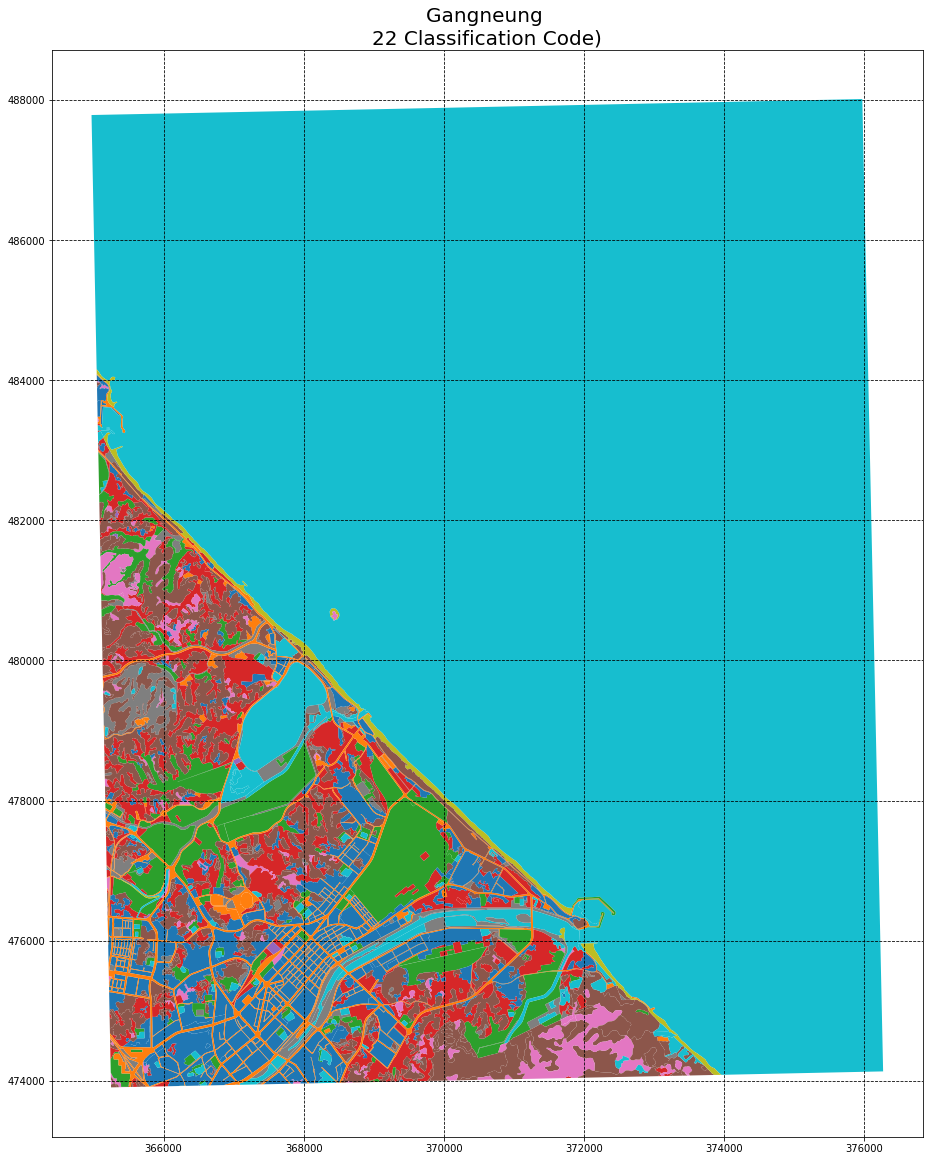

In [65]:
ax = world.plot(figsize = (20,20), column="L2_CODE", categorical=True);
ax.set_title("Gangneung \n22 Classification Code)", fontsize = 20)
#ax.set_axis_off()
ax.grid(True, color = "black", linestyle = "--")
#plt.savefig("/home/ubuntu/Python/Output/22_Classification_Code.png", bbox_inches = "tight")

plt.show()

In [66]:
world["L2_CODE"] = world["L2_CODE"].values.astype("int")

In [67]:
Code23 = [110, 120, 130, 140, 150, 160,
          210, 220, 230, 240, 250,
          310, 320, 330,
          410, 420, 510, 520,
          610, 620, 710, 720, 990]

And13 = [14, 14, 14, 14, 14, 14,
         14, 14, 14, 9, 14,
         9, 8, 2,
         3, 1, 14, 14,
         14, 14, 14, 14, 14]

for i in range(len(Code23)):
    world.loc[world["L2_CODE"] == Code23[i], "L2_CODE"] = And13[i]

In [68]:
world

,L2_CODE,L2_NAME,IMG_NAME,IMG_DATE,ETC_INFO,INX_NUM,geometry
0,14,내륙습지,항공정사영상,12/31/10,구거,378044,"POLYGON ((366223.730 478275.853, 366214.152 47..."
1,14,내륙습지,항공정사영상,12/31/10,구거,378044,"POLYGON ((368133.462 479012.586, 368134.446 47..."
2,14,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367064.179 473943.782, 367011.487 47..."
3,14,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367333.326 474039.345, 367241.645 47..."
4,14,내륙습지,항공정사영상,12/31/10,하천,378044,"POLYGON ((367941.703 474610.933, 367937.885 47..."
...,...,...,...,...,...,...,...
1585,14,인공나지,항공정사영상,12/31/10,None,378044,"POLYGON ((370698.563 477297.344, 370753.464 47..."
1586,14,내륙수,항공정사영상,12/31/10,하천,378044,"POLYGON ((370894.070 474542.604, 370867.552 47..."
1587,14,내륙수,항공정사영상,12/31/10,하천,378044,"POLYGON ((371832.602 476194.245, 371868.660 47..."
1588,14,내륙수,항공정사영상,12/31/10,호소,378044,"POLYGON ((373209.220 474698.587, 373213.448 47..."


In [69]:
world["L2_CODE"].value_counts()

14    1049
8      221
9      117
1       97
2       65
3       41
Name: L2_CODE, dtype: int64

In [70]:
world.crs

<Projected CRS: EPSG:5181>
Name: Korea 2000 / Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea) - 126°E to 128°E mainland
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

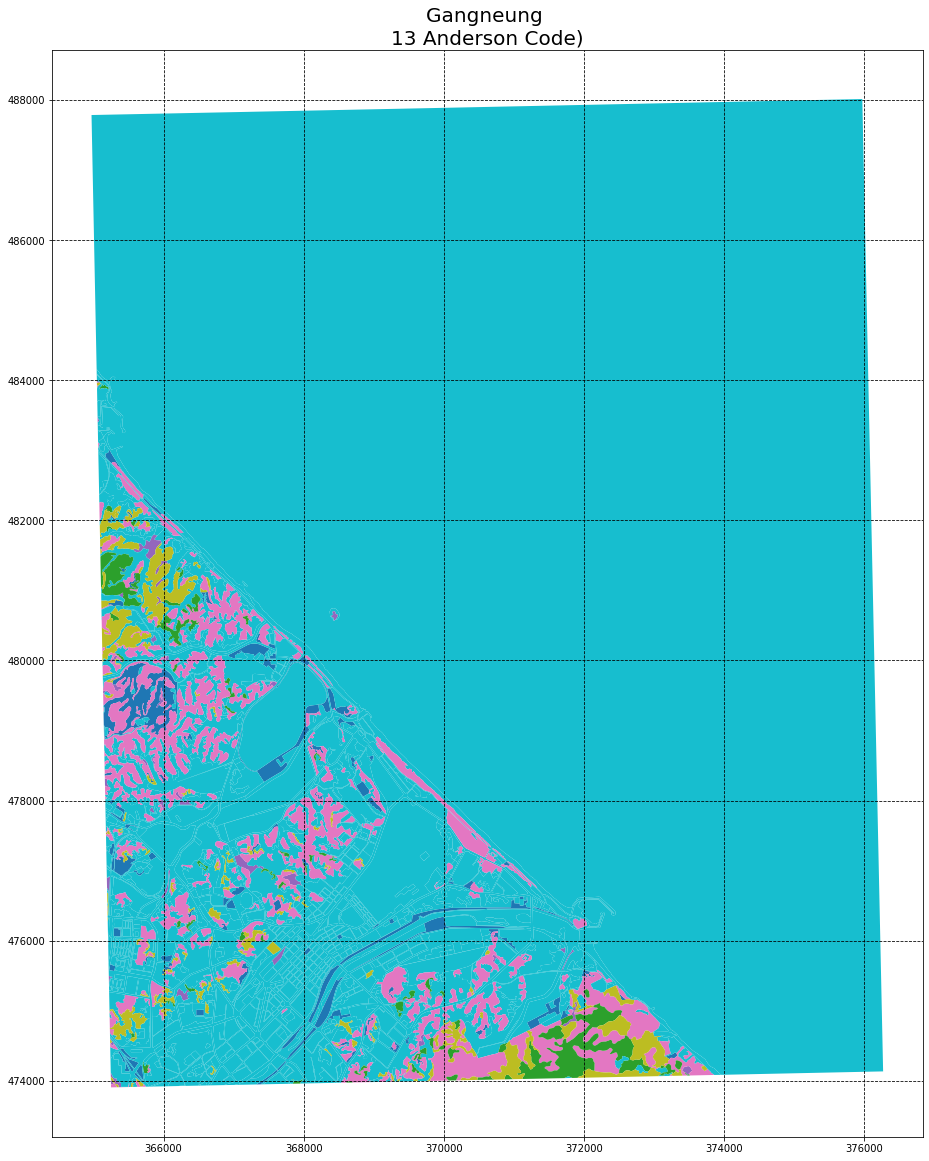

In [71]:
ax = world.plot(figsize = (20,20), column="L2_CODE", categorical=True);
ax.set_title("Gangneung \n13 Anderson Code)", fontsize = 20)
#ax.set_axis_off()
ax.grid(True, color = "black", linestyle = "--")
#plt.savefig("/home/ubuntu/Python/Output/13_Anderson_Code.png", bbox_inches = "tight")

plt.show()

In [72]:
world.to_file("/home/ubuntu/Python/Data/gangneung_13anderson.shp", encoding = "CP949")